# Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Laboratory Exercise - Run Mode (8 points)

## The Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [2]:
data = pd.read_csv("data/spotify_songs.csv")
data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.0724,NaN,0.3570,0.693,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.0794,NaN,0.1100,0.613,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,pop


Preprocess the input and the output variables appropriately.

In [3]:
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(data['genre'])
data['genre'] = encoded_values

Explore the dataset using visualizations of your choice.

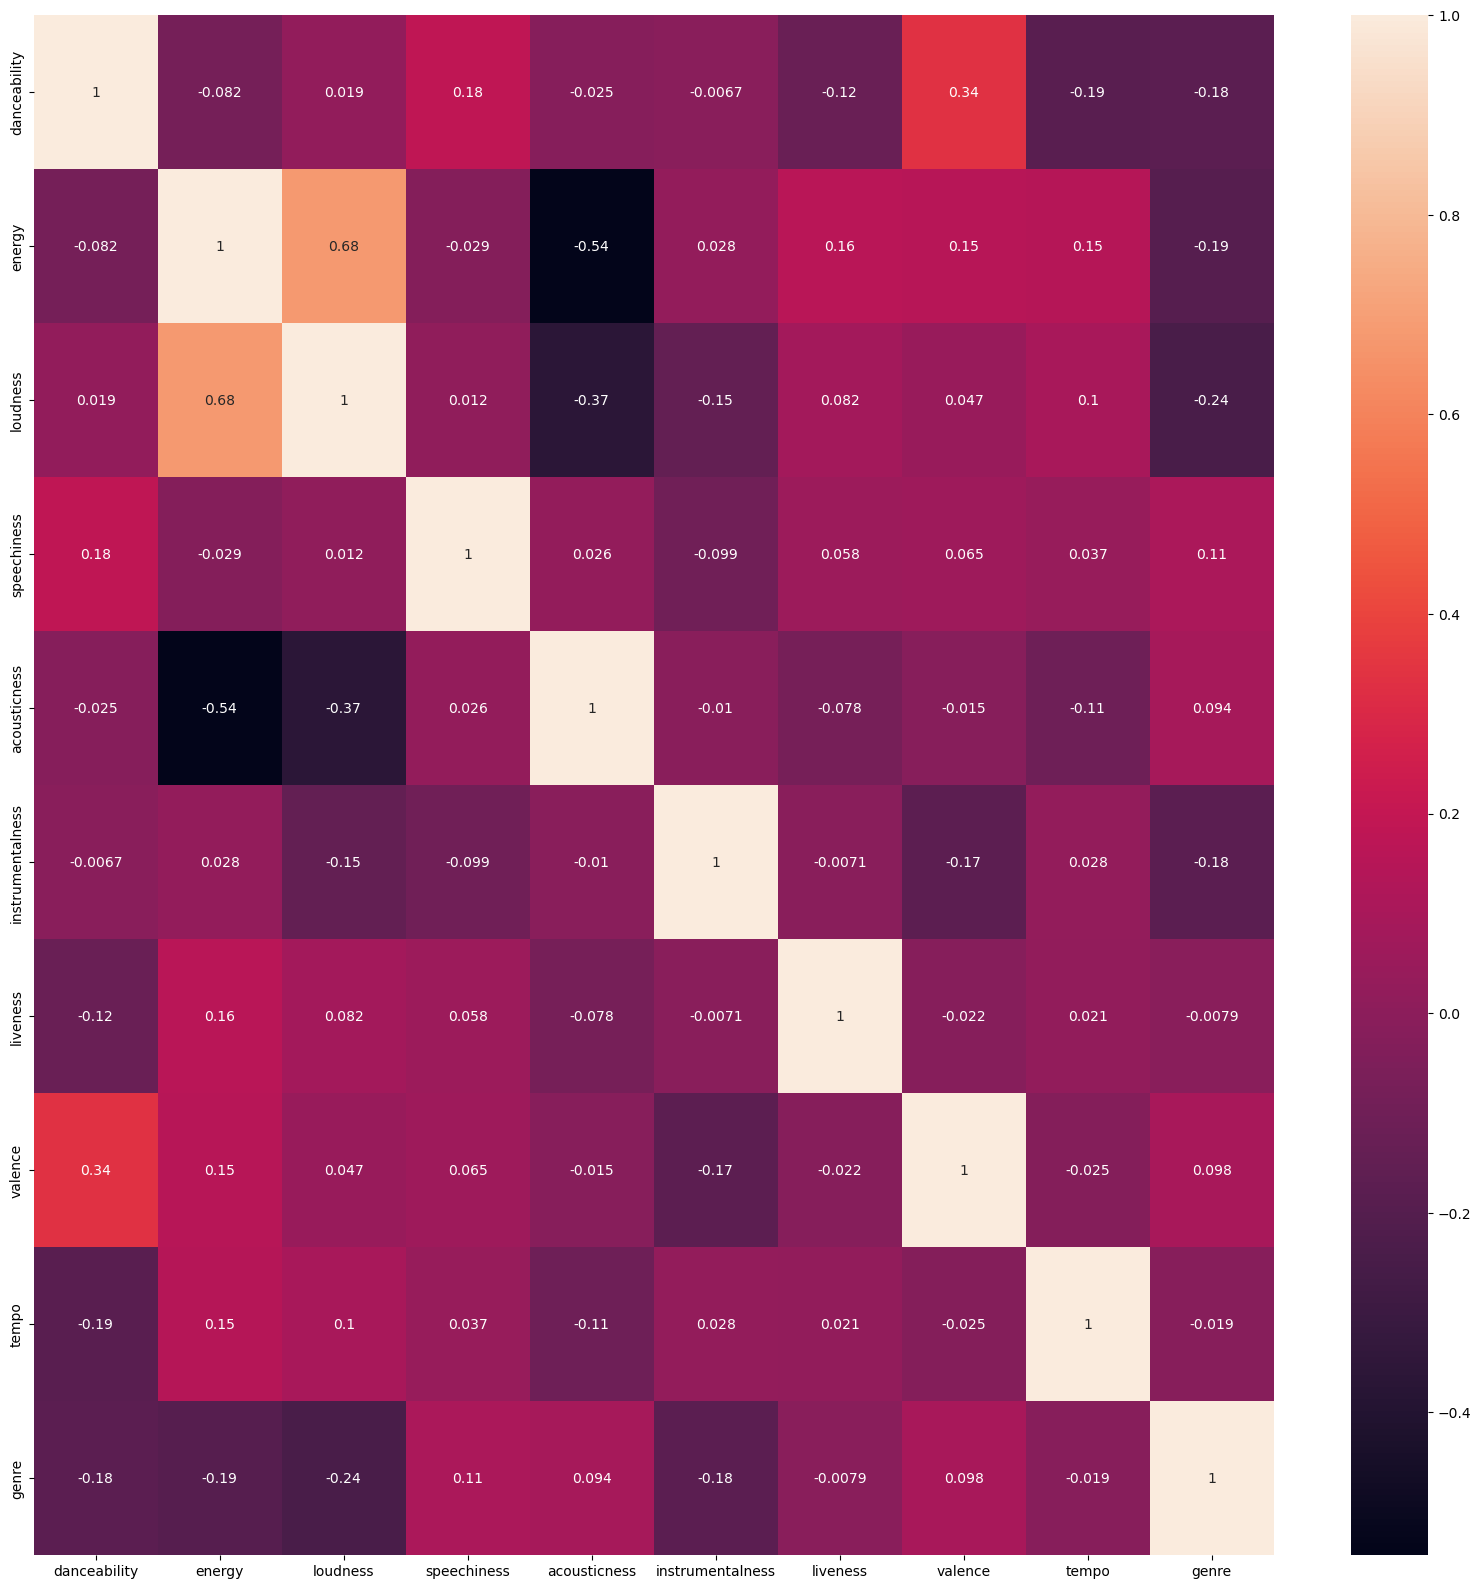

In [4]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

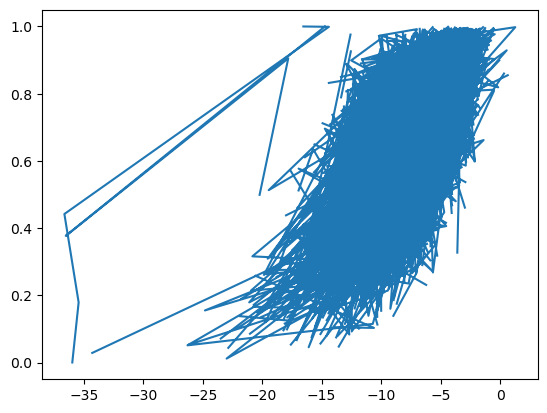

In [5]:
plt.plot(data['loudness'], data['energy']) 

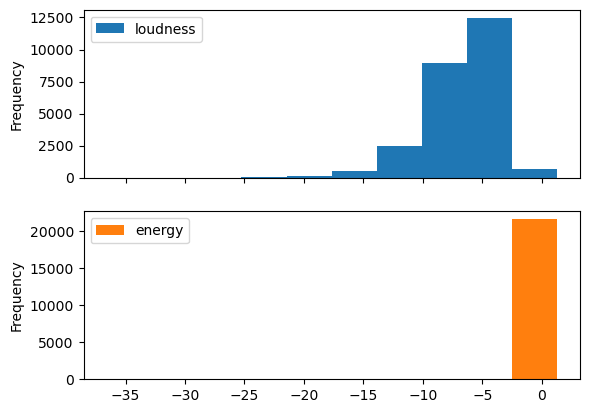

In [6]:
data[['loudness', 'energy']].plot.hist(subplots=True)
plt.show()

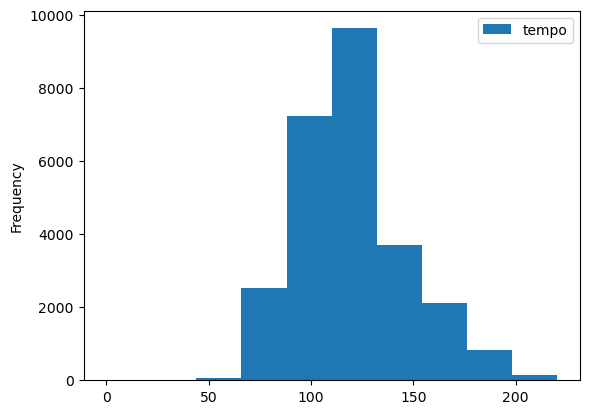

In [7]:
data[['tempo']].plot.hist()
plt.show()

Check if the dataset is balanced.

In [8]:
b = data['genre'].value_counts() / len(data) * 100
b = b.reset_index().rename(columns={"count": "percent"})
b

,genre,percent
0,0,18.405263
1,4,17.500685
2,2,16.772759
3,3,16.541285
4,1,15.700667
5,5,15.079341


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [9]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_percent

,column,percent missing
0,danceability,11.153413
1,energy,34.297810
2,loudness,23.208357
3,speechiness,7.190936
4,acousticness,2.722870
5,instrumentalness,19.705784
6,liveness,9.094509
7,valence,22.809369
8,tempo,19.970761
9,genre,0.000000


In [10]:
data.isnull().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

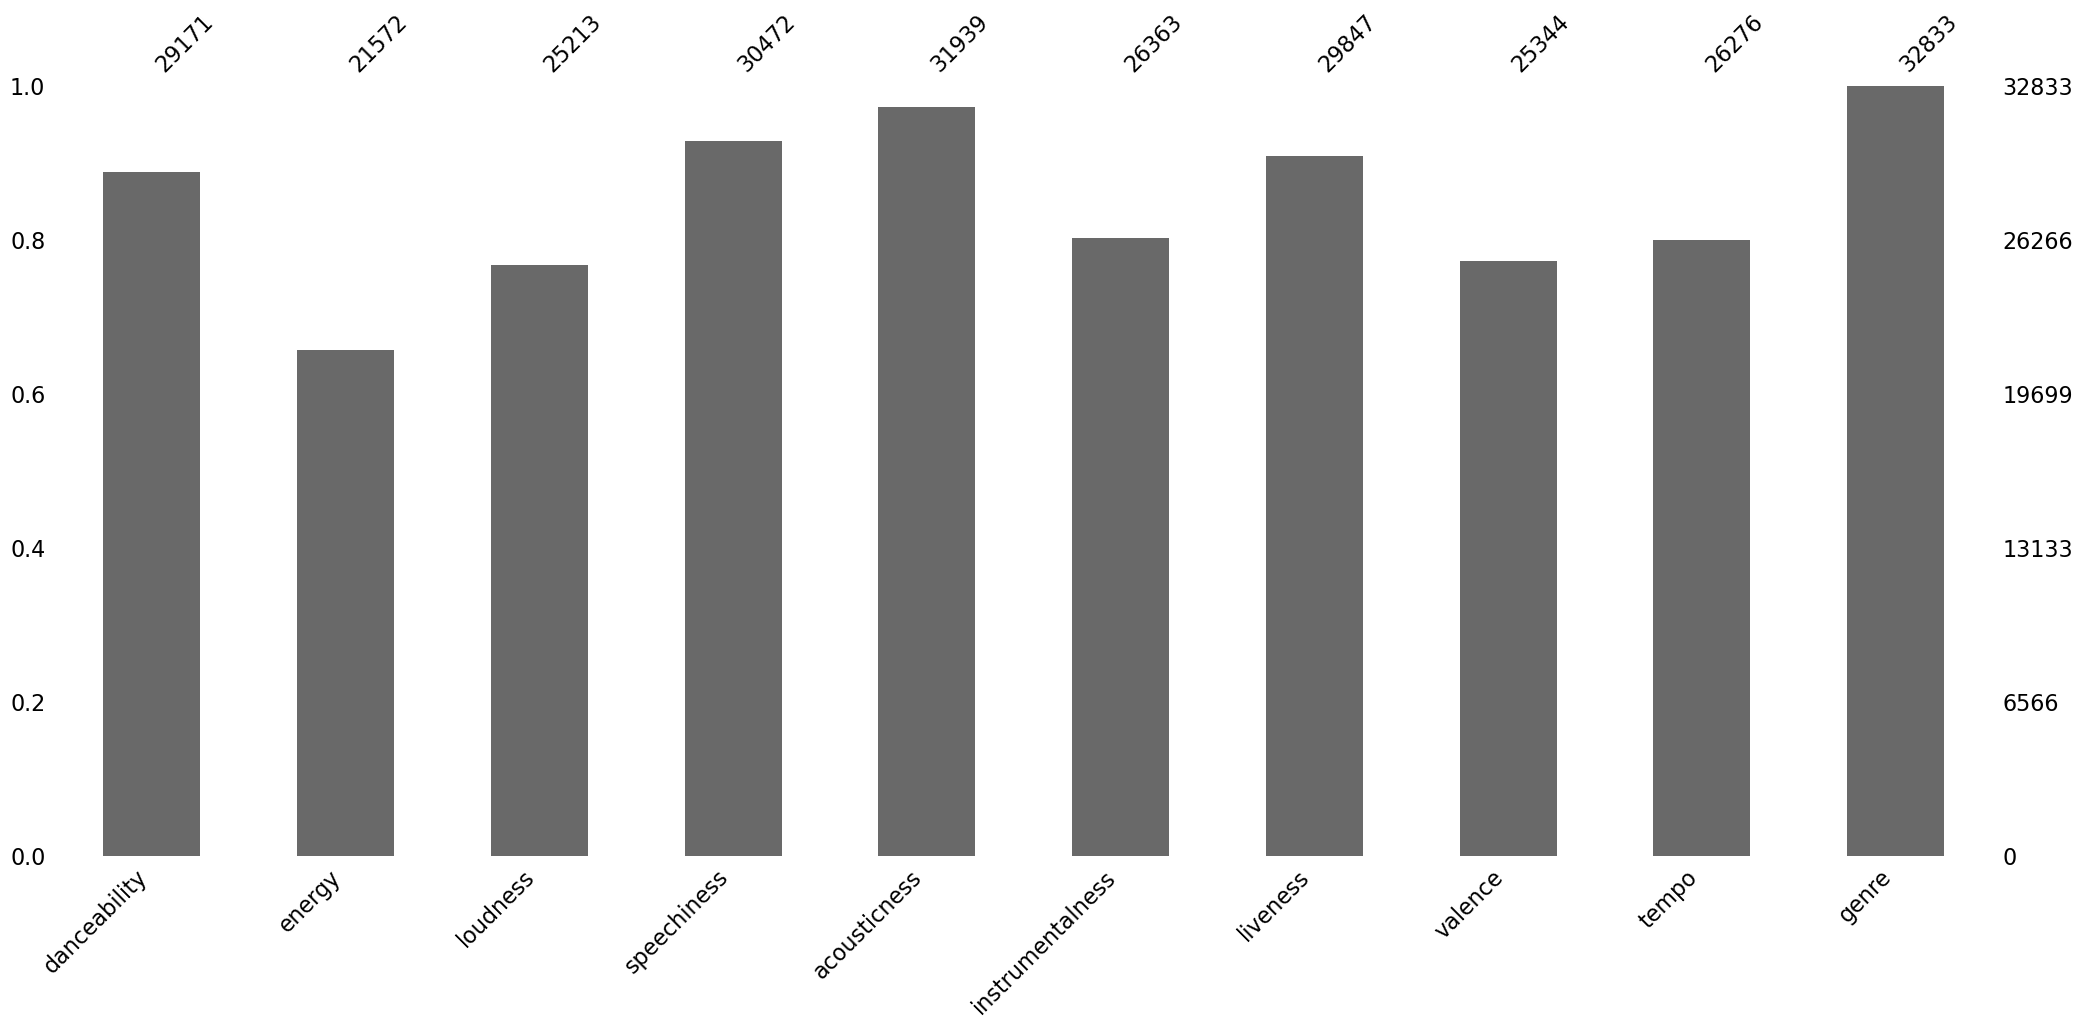

In [11]:
msno.bar(data)
plt.show()

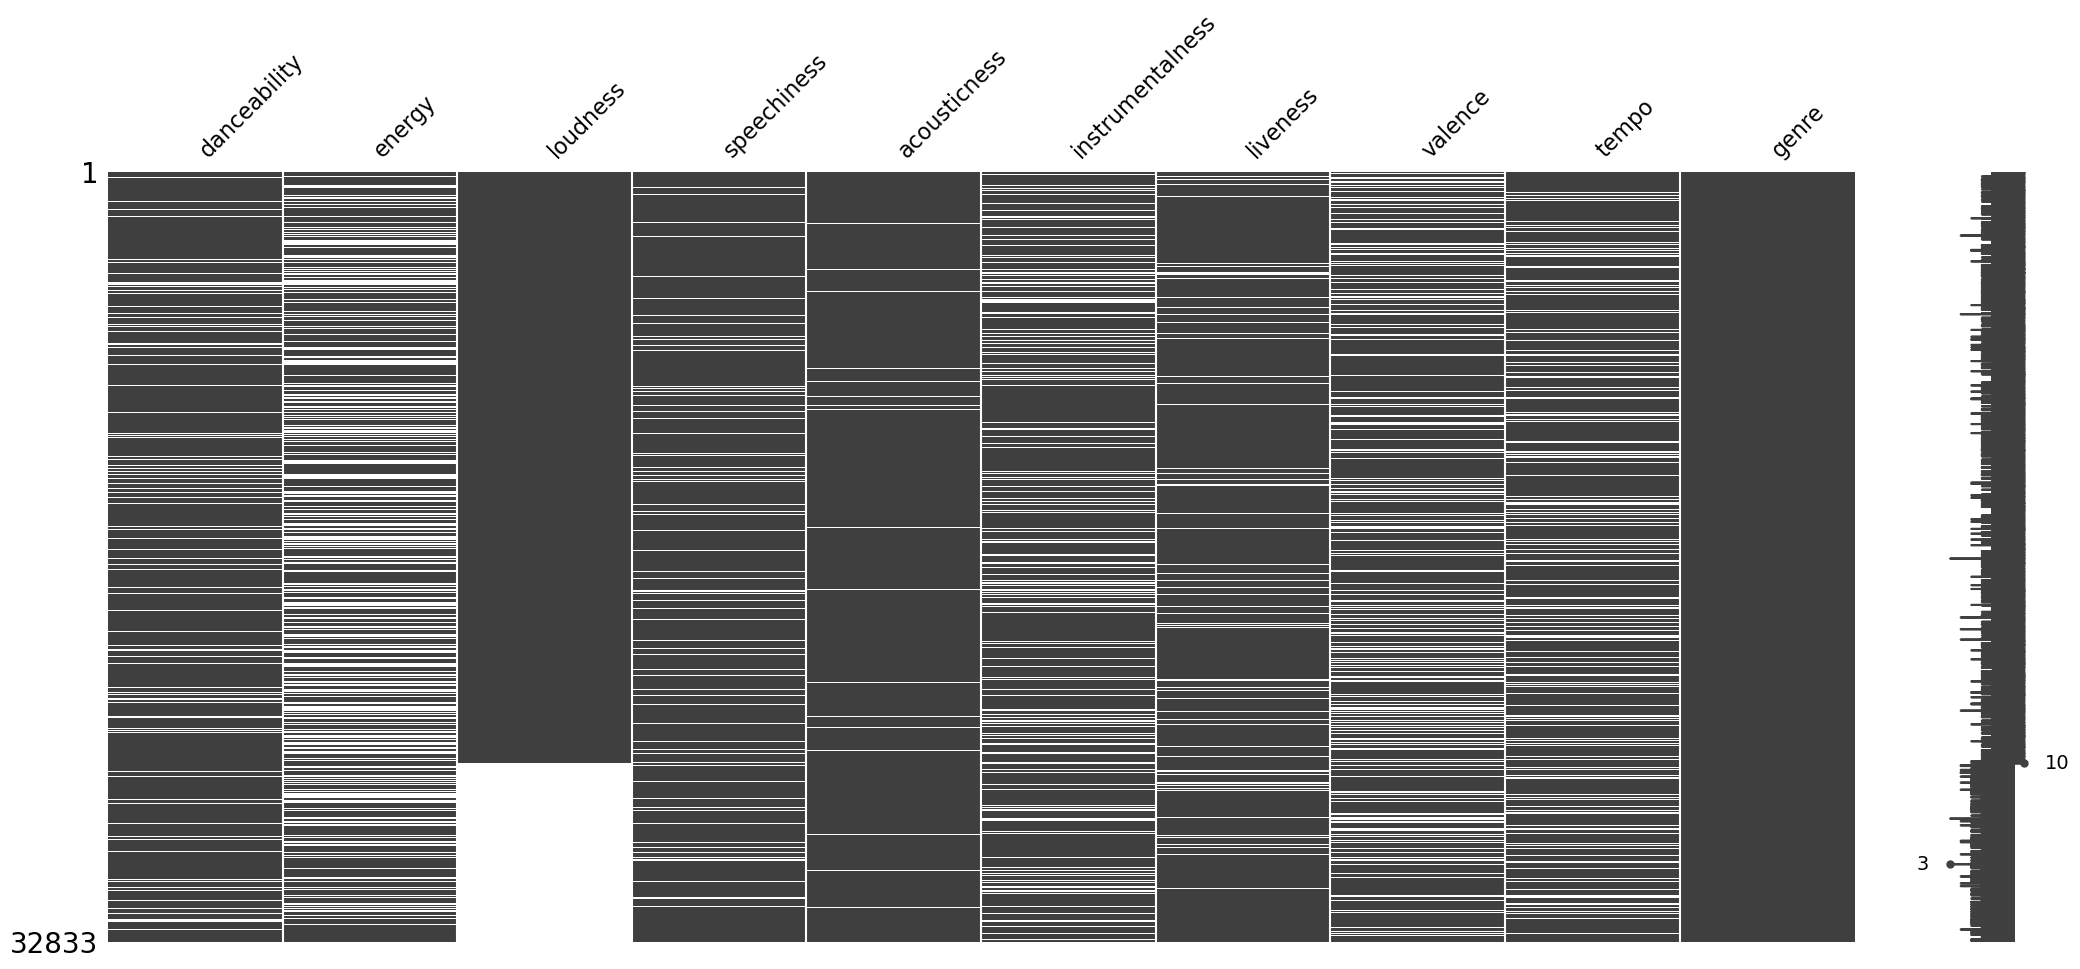

In [12]:
msno.matrix(data.sort_values('loudness'))
plt.show()

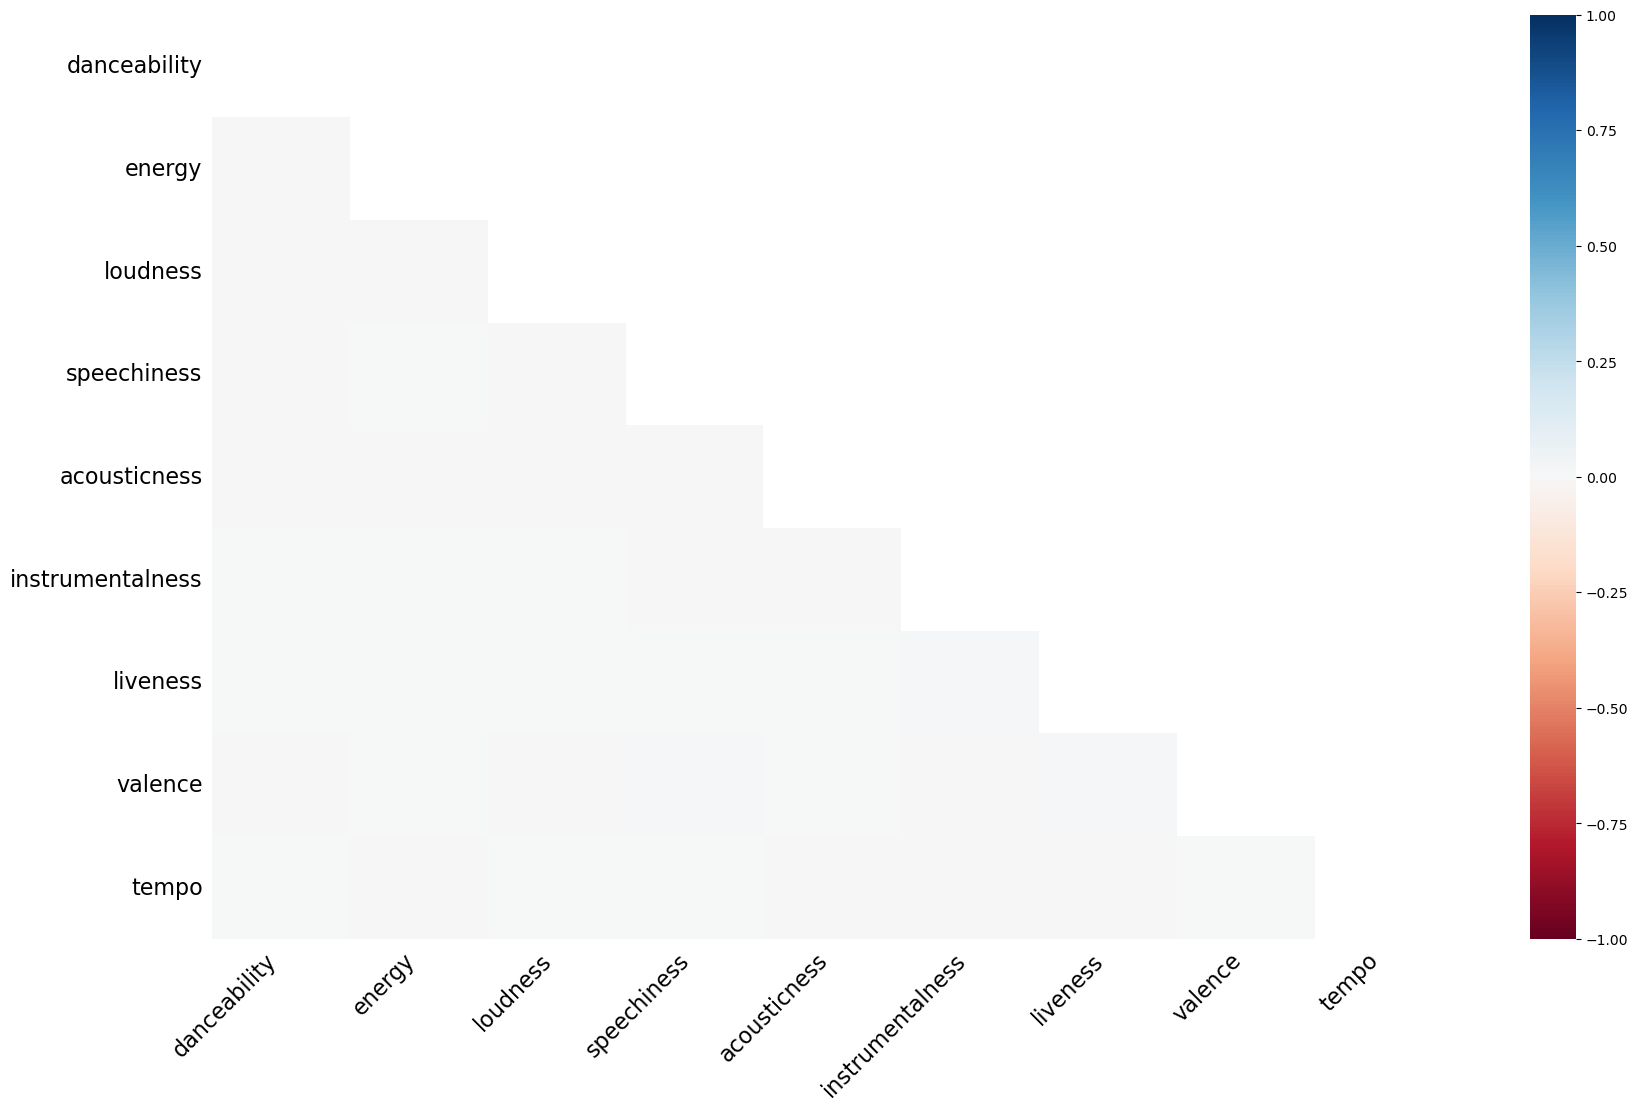

In [13]:
msno.heatmap(data)
plt.show()

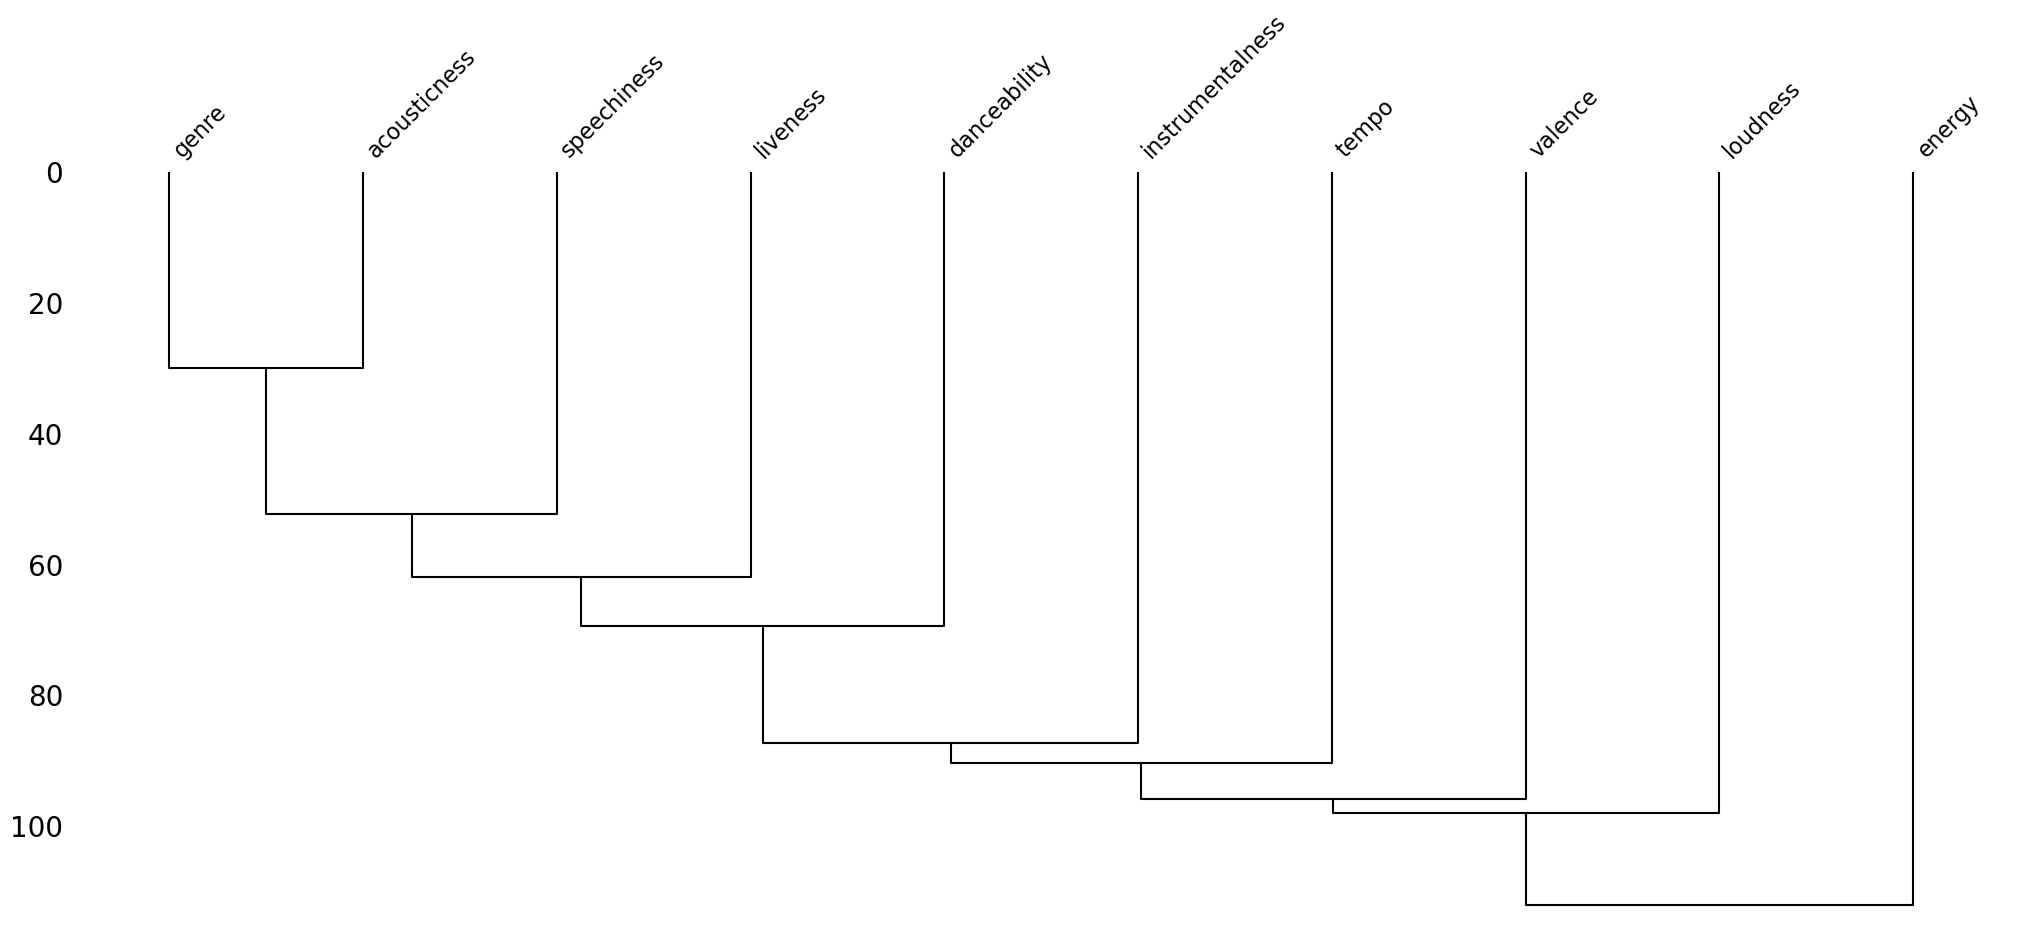

In [14]:
msno.dendrogram(data)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [15]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['loudness', 'energy']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data = scaler.inverse_transform(imputed_data)
data[['loudness', 'energy']] = imputed_data

In [16]:
data.isnull().sum()

danceability        3662
energy                 0
loudness               0
speechiness         2361
acousticness         894
instrumentalness    6470
liveness            2986
valence             7489
tempo               6557
genre                  0
dtype: int64

In [17]:
data.danceability = data.danceability.fillna(data.danceability.mean())

In [18]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['speechiness', 'acousticness']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data = scaler.inverse_transform(imputed_data)
data[['speechiness', 'acousticness']] = imputed_data

In [19]:
data.valence = data.valence.fillna(data.valence.mean())

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
mice = IterativeImputer()
imputed_values = mice.fit_transform(data[['instrumentalness', 'liveness', 'tempo']])
data[['instrumentalness', 'liveness', 'tempo']] = imputed_values

In [21]:
data.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [34]:
X = data.drop(['genre'],axis=1)
Y = data.genre

In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

## Feature Scaling
Standardize the features appropriately.

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## Model Selection

Choose and train an approriate model for the given task.

In [47]:
# from sklearn.impute import KNNImputer
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors=5)
# classifier.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 0, 0, ..., 0, 5, 1])

Assess the performance of the model by using different classification metrics.

In [49]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='micro'))
print(f1_score(y_test,y_pred,average='macro'))
print(confusion_matrix(y_test,y_pred))

0.5459113750571037
0.5459113750571037
0.541766380839841
[[897  75 104  43  34  38]
 [150 574  94  96  98  36]
 [246 154 440  98  54  79]
 [106 181 118 466 120  61]
 [105 159  96 174 629  37]
 [118  71 112 102  23 579]]


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [53]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
params = {
    'criterion': ['gini','entropy'],
    'max_depth':[5,10,15],
}
grid = GridSearchCV(rf,params)
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15]})

In [54]:
y_pred = grid.best_estimator_.predict(X_test)

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [55]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='micro'))
print(f1_score(y_test,y_pred,average='macro'))
print(confusion_matrix(y_test,y_pred))

0.4881242387332521
0.4881242387332521
0.4787858163540581
[[361  29  91  27  44  31]
 [ 66 162  69  75  95  34]
 [ 85  73 183  79  52 103]
 [ 24  60  62 199 127  60]
 [ 42  60  31  69 351  23]
 [ 35  12  61  42  20 347]]
